In [ ]:
# MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((訓練用圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


是什麼? 4


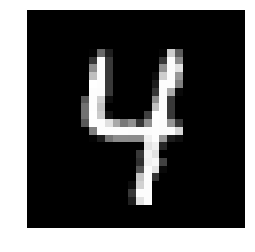

In [7]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
plt.axis("off")
print("是什麼?", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [ ]:
# 圖片處理:1. 攤開:reshape  2. 